# Exploratory data analysis (EDA) of apartments data

## Libraries and settings

In [1]:
# Libraries
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as py

# seaborn graphics settings
sns.set(color_codes=True)

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Show current working directory
print(os.getcwd())

C:\Users\n-win\Desktop\ZHAW\Classes\Data Analytics\data_analytics\Week_04


## Univariate non-graphical exploratory data analysis (EDA)

### Importing the enriched apartment data

In [2]:
# Read and select variables
df_orig = pd.read_csv("apartments_data_enriched.csv")[['web-scraper-order',
                                                        'address_raw',
                                                        'lat',
                                                        'lon',
                                                        'bfs_number',
                                                        'bfs_name',
                                                        'rooms', 
                                                        'area', 
                                                        'luxurious', 
                                                        'price', 
                                                        'price_per_m2',
                                                        'pop',
                                                        'pop_dens',
                                                        'emp',
                                                        'frg_pct',
                                                        'mean_taxable_income']]

# Remove duplicates
df_orig = df_orig.drop_duplicates()
df_orig.head(5)

# Remove missing values
df_orig = df_orig.dropna()
df_orig.head(5)

,web-scraper-order,address_raw,lat,lon,bfs_number,bfs_name,rooms,area,luxurious,price,price_per_m2,pop,pop_dens,emp,frg_pct,mean_taxable_income
0,1693998201-1,"Neuhusstrasse 6, 8630 Rüti ZH, ZH",47.252171,8.845797,118,Rüti (ZH),3.0,49.0,0,1441.0,29.41,12286,1221.272366,5053.0,24.841283,65362.042683
1,1693998233-172,"Widacherstrasse 5, 8630 Rüti ZH, ZH",47.252087,8.854919,118,Rüti (ZH),3.0,111.0,0,2600.0,23.42,12286,1221.272366,5053.0,24.841283,65362.042683
2,1693998256-331,"Widenweg 14, 8630 Rüti ZH, ZH",47.253670,8.853993,118,Rüti (ZH),3.0,58.0,0,1490.0,25.69,12286,1221.272366,5053.0,24.841283,65362.042683
3,1693998265-381,"Rain 1, 8630 Rüti ZH, ZH",47.259834,8.851705,118,Rüti (ZH),4.0,118.0,0,3240.0,27.46,12286,1221.272366,5053.0,24.841283,65362.042683
4,1693998276-419,"Bachtelstrasse 24b, 8630 Rüti ZH, ZH",47.266113,8.866872,118,Rüti (ZH),3.0,66.0,0,1450.0,21.97,12286,1221.272366,5053.0,24.841283,65362.042683


### Quantiles original values

In [3]:
df_orig[['price','rooms', 'area', 'price_per_m2', 'pop_dens']].quantile(q=[0.05, 0.10, 0.25, 0.50, 0.75, 0.90, 0.95]).round(2)

,price,rooms,area,price_per_m2,pop_dens
0.05,1337.00,1.00,26.00,17.90,336.03
0.10,1492.50,1.50,41.50,20.02,525.66
0.25,1842.25,2.50,63.00,23.30,1044.63
0.50,2391.00,3.50,86.00,27.95,1662.60
0.75,3056.75,4.50,108.75,38.12,4778.99
0.90,3960.00,4.75,140.50,52.78,4778.99
0.95,4957.50,5.50,163.75,67.33,4778.99


### Filter apartments

In [4]:
# Filter apartments (replace '<= 5000' by the respective operator and quantile)
df = df_orig.loc[df_orig['pop_dens'] <= 5000]

### Shape (number of rows and colums)

In [5]:
# Number of rows and columns
print(df.shape)

(786, 16)


### Data types

In [6]:
df.dtypes

web-scraper-order       object
address_raw             object
lat                    float64
lon                    float64
bfs_number               int64
bfs_name                object
rooms                  float64
area                   float64
luxurious                int64
price                  float64
price_per_m2           float64
pop                      int64
pop_dens               float64
emp                    float64
frg_pct                float64
mean_taxable_income    float64
dtype: object

### Summary statistics of numeric variables

In [7]:
df.describe()

,lat,lon,bfs_number,rooms,area,luxurious,price,price_per_m2,pop,pop_dens,emp,frg_pct,mean_taxable_income
count,786.000000,786.000000,786.000000,786.000000,786.000000,786.000000,786.000000,786.000000,786.000000,786.000000,786.000000,786.000000,786.000000
mean,47.407331,8.600386,186.862595,3.421756,92.426209,0.012723,2649.339695,33.336489,161145.898219,2503.950703,177328.709924,27.771168,80631.662280
std,0.085343,0.117298,81.404652,1.304543,75.786527,0.112146,1289.074423,17.141739,186630.497367,1748.039181,223745.725478,7.592012,14393.861209
min,47.195290,8.367652,1.000000,1.000000,8.000000,0.000000,10.000000,0.040000,698.000000,87.959866,129.000000,7.547170,62000.541872
25%,47.361061,8.518511,121.000000,2.500000,63.000000,0.000000,1842.250000,23.302500,8775.000000,1044.628957,3460.000000,24.535004,71059.805603
50%,47.395105,8.562069,230.000000,3.500000,86.000000,0.000000,2391.000000,27.950000,27746.000000,1662.597326,19226.000000,28.059994,82404.831614
75%,47.481115,8.710458,261.000000,4.500000,108.750000,0.000000,3056.750000,38.125000,420217.000000,4778.994655,491193.000000,32.458468,82932.737704
max,47.693893,8.915933,298.000000,8.500000,1633.000000,1.000000,9950.000000,149.900000,420217.000000,4778.994655,491193.000000,46.226483,174434.537050


### Statistical measures (min, max, std, mean, median, count) for selected variables

In [8]:
# Price
print('Price:',
      'Count:', round(df.price.count(), 1),
      'Min:', round(df.price.min(), 1),
      'Max:', round(df.price.max(), 1),
      'Mean:', round(df.price.mean(), 1),
      'Median:', round(df.price.median(), 1),
      'Std:', round(df.price.std(), 1))

# Area
print('Area:',
      'Count:', round(df.area.count(), 1),
      'Min:', round(df.area.min(), 1),
      'Max:', round(df.area.max(), 1),
      'Mean:', round(df.area.mean(), 1),
      'Median:', round(df.area.median(), 1),
      'Std:', round(df.area.std(), 1))

Price: Count: 786 Min: 10.0 Max: 9950.0 Mean: 2649.3 Median: 2391.0 Std: 1289.1
Area: Count: 786 Min: 8.0 Max: 1633.0 Mean: 92.4 Median: 86.0 Std: 75.8


### Skewness

In [9]:
df[['price','rooms', 'area']].skew()

price     2.093405
rooms     0.209733
area     12.529695
dtype: float64

### Kurtosis

In [10]:
df[['price','rooms', 'area']].kurtosis()

price      6.668070
rooms      0.085123
area     232.607355
dtype: float64

### Extreme values

In [11]:
# Low costs apartments
df[df['price_per_m2'] <= 10]

,web-scraper-order,address_raw,lat,lon,bfs_number,bfs_name,rooms,area,luxurious,price,price_per_m2,pop,pop_dens,emp,frg_pct,mean_taxable_income
183,1693998317-653,"8001 Zürich, ZH",47.374966,8.543989,261,Zürich,4.5,137.0,0,16.0,0.12,420217,4778.994655,491193.0,32.458468,82932.737704
198,1693998326-702,"Hohenbühlstrasse 7, 8032 Zürich, ZH",47.366306,8.551867,261,Zürich,5.5,183.0,0,10.0,0.05,420217,4778.994655,491193.0,32.458468,82932.737704
404,1693998205-39,"Binzigerstrasse 52, 8707 Uetikon am See, ZH",47.267185,8.689932,159,Uetikon am See,6.5,300.0,1,11.0,0.04,6201,1792.196532,1480.0,21.270763,118977.376698
511,1693998369-926,"Dorfstrasse 2, 8309 Nürensdorf, ZH",47.458389,8.638629,64,Nürensdorf,6.5,863.0,0,4500.0,5.21,5602,557.968127,1031.0,16.815423,99039.717665
584,1693998289-482,"Lärchenstrasse 6, 8442 Hettlingen, ZH",47.547836,8.717198,221,Hettlingen,6.0,1633.0,0,3900.0,2.39,3169,537.118644,702.0,9.056485,101569.727626
762,1693998280-447,"Grabenwiese 2, 8484 Weisslingen, ZH",47.426781,8.767586,180,Weisslingen,6.5,585.0,0,3250.0,5.56,3364,262.607338,886.0,10.434007,84173.291925


In [12]:
# Very expansive apartments
df[df['price_per_m2'] >= 100]

,web-scraper-order,address_raw,lat,lon,bfs_number,bfs_name,rooms,area,luxurious,price,price_per_m2,pop,pop_dens,emp,frg_pct,mean_taxable_income
11,1693998201-16,"Wolframplatz 1, 8045 Zürich, ZH",47.362282,8.522193,261,Zürich,2.0,32.0,0,3515.0,109.84,420217,4778.994655,491193.0,32.458468,82932.737704
20,1693998214-82,"Baurstrasse 29, 8008 Zürich, ZH",47.355923,8.554498,261,Zürich,1.5,30.0,0,3790.0,126.33,420217,4778.994655,491193.0,32.458468,82932.737704
21,1693998214-83,"Baurstrasse 29, 8008 Zürich, ZH",47.355923,8.554498,261,Zürich,1.5,25.0,0,3490.0,139.60,420217,4778.994655,491193.0,32.458468,82932.737704
107,1693998280-434,"Neugasse 40, 8005 Zürich, ZH",47.382469,8.530180,261,Zürich,1.0,11.0,0,1120.0,101.82,420217,4778.994655,491193.0,32.458468,82932.737704
154,1693998305-585,"Steinstrasse 35, 8003 Zürich, ZH",47.366997,8.520324,261,Zürich,1.0,15.0,0,1500.0,100.00,420217,4778.994655,491193.0,32.458468,82932.737704
171,1693998309-621,"Baurstrasse 29, 8008 Zürich, ZH",47.355923,8.554498,261,Zürich,1.5,30.0,0,3890.0,129.67,420217,4778.994655,491193.0,32.458468,82932.737704
185,1693998317-658,"8004 Zürich, ZH",47.380417,8.525352,261,Zürich,1.0,10.0,0,1499.0,149.90,420217,4778.994655,491193.0,32.458468,82932.737704


### Get a list of categories of categorical variable

In [13]:
np.array(pd.Categorical(df['bfs_name']).categories)

array(['Adliswil', 'Aeugst am Albis', 'Affoltern am Albis', 'Altikon',
       'Andelfingen', 'Bachenbülach', 'Bassersdorf', 'Bauma',
       'Bonstetten', 'Brütten', 'Bülach', 'Dielsdorf', 'Dietikon',
       'Dietlikon', 'Dättlikon', 'Dübendorf', 'Dürnten', 'Egg', 'Eglisau',
       'Elsau', 'Embrach', 'Fehraltorf', 'Feuerthalen',
       'Freienstein-Teufen', 'Fällanden', 'Glattfelden', 'Gossau (ZH)',
       'Greifensee', 'Hausen am Albis', 'Hedingen', 'Herrliberg',
       'Hettlingen', 'Hinwil', 'Hittnau', 'Hochfelden', 'Hombrechtikon',
       'Höri', 'Hüttikon', 'Kloten', 'Knonau', 'Küsnacht (ZH)',
       'Langnau am Albis', 'Laufen-Uhwiesen', 'Lindau', 'Lufingen',
       'Maur', 'Meilen', 'Mettmenstetten', 'Männedorf', 'Mönchaltorf',
       'Neerach', 'Neftenbach', 'Niederglatt', 'Niederhasli',
       'Niederweningen', 'Nürensdorf', 'Oberengstringen', 'Oberglatt',
       'Obfelden', 'Oetwil am See', 'Oetwil an der Limmat', 'Opfikon',
       'Ossingen', 'Pfungen', 'Pfäffikon', 'Regensd

## Multivariate non-graphical exploratory data analysis (EDA)

### Cross-tabulation

In [14]:
pd.crosstab(df['luxurious'], df['rooms'])

rooms,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0,5.5,6.0,6.5,7.0,7.5,8.5
luxurious,,,,,,,,,,,,,,,
0,52,36,39,135,44,200,28,164,3,53,3,13,2,3,1
1,0,0,0,6,0,3,0,0,0,0,0,1,0,0,0


### Pivot tables

In [15]:
# Using pivot_table to reshape the data and calculate means 
pd.pivot_table(df[['rooms', 'price', 'price_per_m2', 'area', 'luxurious']],
               index=['rooms', 'luxurious'],
               values=['price', 'price_per_m2', 'area'],
               aggfunc=(np.mean, 'count'))

area             price              price_per_m2           
                count        mean count         mean        count       mean
rooms luxurious                                                             
1.0   0            52   32.057692    52  1306.346154           52  50.168077
1.5   0            36   35.333333    36  2110.166667           36  65.455000
2.0   0            39   54.589744    39  2155.846154           39  42.528462
2.5   0           135   66.800000   135  2382.755556          135  37.010000
      1             6   72.166667     6  3339.500000            6  45.978333
3.0   0            44   68.159091    44  1964.022727           44  28.677955
3.5   0           200   89.770000   200  2648.980000          200  29.494700
      1             3  101.666667     3  6036.666667            3  59.826667
4.0   0            28   98.464286    28  2852.357143           28  29.646429
4.5   0           164  115.060976   164  3067.847561          164  26.332622
5.0   0             3  108.000000     3  2881.666667            3  26.376667
5.5   0            53  153.811321    53  3523.094340           53  23.143396
6.0   0             3  667.666667     3  3833.333333            3  15.706667
6.5   0            13  253.000000    13  4077.461538           13  21.676154
      1             1  300.000000     1    11.000000            1   0.040000
7.0   0             2  175.000000     2  6350.000000            2  36.325000
7.5   0             3  205.000000     3  4765.000000            3  23.273333
8.5   0             1  210.000000     1  8500.000000            1  40.480000

### Correlation matrix

In [16]:
corr = df[['rooms', 
          'area', 
          'price', 
          'price_per_m2',
          'pop_dens',
          'frg_pct']].cov().corr()
corr

,rooms,area,price,price_per_m2,pop_dens,frg_pct
rooms,1.000000,0.994278,0.489308,-0.529276,-0.635035,-0.717159
area,0.994278,1.000000,0.554403,-0.460172,-0.569562,-0.657421
price,0.489308,0.554403,1.000000,0.480956,0.362619,0.256582
price_per_m2,-0.529276,-0.460172,0.480956,1.000000,0.991165,0.970554
pop_dens,-0.635035,-0.569562,0.362619,0.991165,1.000000,0.993760
frg_pct,-0.717159,-0.657421,0.256582,0.970554,0.993760,1.000000


### Covariance matrix

In [17]:
cov = df[['rooms', 
          'area', 
          'price', 
          'price_per_m2',
          'pop_dens',
          'frg_pct']].cov()
cov

,rooms,area,price,price_per_m2,pop_dens,frg_pct
rooms,1.701832,53.983072,7.535699e+02,-10.918122,-7.421349e+02,-2.844866
area,53.983072,5743.597733,3.395904e+04,-432.361623,-2.592857e+04,-138.172149
price,753.569925,33959.041022,1.661713e+06,5774.838303,6.157488e+05,794.060532
price_per_m2,-10.918122,-432.361623,5.774838e+03,293.839203,1.750019e+04,43.945653
pop_dens,-742.134930,-25928.569102,6.157488e+05,17500.189962,3.055641e+06,8736.395054
frg_pct,-2.844866,-138.172149,7.940605e+02,43.945653,8.736395e+03,57.638648


## Univariate graphical exploratory data analysis (EDA)

### Line chart (matplotlib)

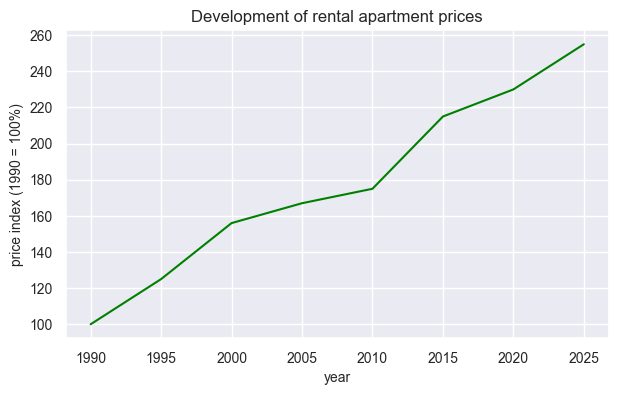

In [18]:
# Generate some useful values (time series)
x = [1990, 1995, 2000, 2005, 2010, 2015, 2020, 2025]
y = [100, 125, 156, 167, 175, 215, 230, 255]

# Create figure
fig = plt.figure(figsize=(7,4))
plt.plot(x, y, color="green")
plt.title('Development of rental apartment prices', fontsize=12)
plt.xlabel('year', fontsize=10)
plt.ylabel('price index (1990 = 100%)', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

### Boxplot (seaborn)

<Axes: xlabel='area'>

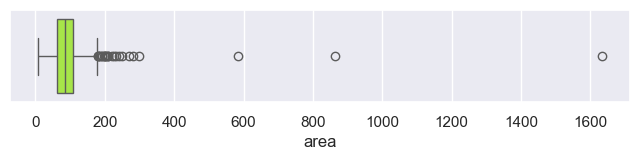

In [19]:
plt.figure(figsize=(8,1.2))
plt.ticklabel_format(style='plain')
sns.boxplot(x=df['area'], color="greenyellow")

### Histogram  (matplotlib)

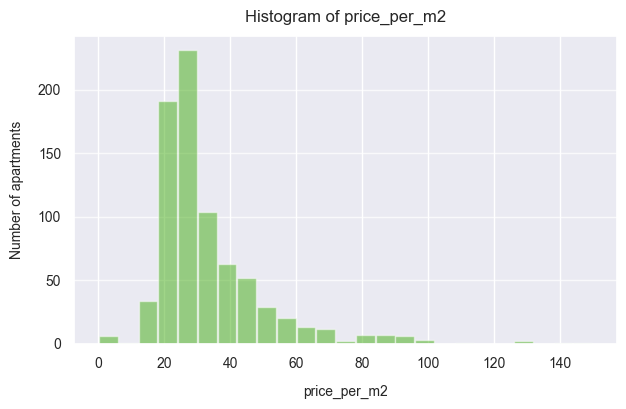

In [20]:
import matplotlib.pyplot as plt
import numpy as np

# Plot Histogram
fig = plt.figure( figsize=(7,4))

plt.xticks(fontsize=14, rotation=0)
plt.yticks(fontsize=14, rotation=0)

n, bins, patches = plt.hist(x=df['price_per_m2'], 
                            bins=25, 
                            color='#42AD12',
                            alpha=0.5, 
                            rwidth=0.95
                   )
plt.grid(True)
plt.ticklabel_format(style='plain')
plt.grid(axis='y', alpha=0.75)

# Set labels
plt.xlabel('price_per_m2', fontsize=10, labelpad=10)
plt.ylabel('Number of apartments', fontsize=10, labelpad=10)
plt.title('Histogram of price_per_m2', fontsize=12, pad=10)

# Set fontsize of tick labels
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)

plt.show()

### Density plot  (seaborn)

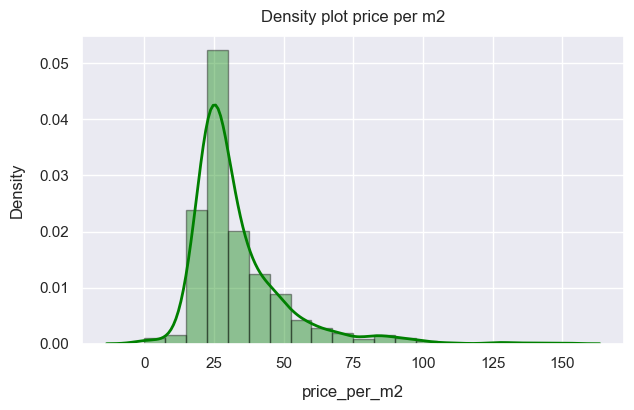

In [21]:
plt.figure(figsize=(7,4))
sns.distplot(df['price_per_m2'], 
             hist=True, 
             kde=True, 
             bins=20, 
             color = 'green',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2},
            )
plt.title('Density plot price per m2', fontsize=12, pad=10)
plt.xlabel('price_per_m2', fontsize=12, labelpad=10)
plt.ylabel('Density', fontsize=12, labelpad=10)
plt.grid(True)
plt.show()

### Quantile-Quantile (QQ-) plot

       area        var
682     8.0  -1.114000
185    10.0  -1.087610
107    11.0  -1.074415
190    14.0  -1.034830
52     15.0  -1.021636
..      ...        ...
445   282.0   2.501418
404   300.0   2.738927
762   585.0   6.499490
511   863.0  10.167688
584  1633.0  20.327806

[786 rows x 2 columns]


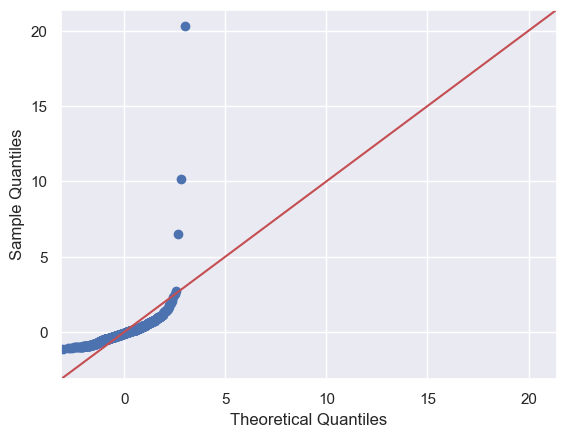

In [22]:
# Variable (standardized)
x = 'area'
df_qq = df
df_qq['var'] = (df[x]-df[x].mean()) / df[x].std()
print(df_qq.sort_values('var')[['area', 'var']])
    
# Plot
sm.qqplot(df_qq['var'], line ='45')
py.show()

### Barchart  (matplotlib)

In [23]:
# Group data by rooms (only the topmost 15 values are shown)
df_bar = df['rooms'].value_counts().nlargest(15).sort_values(ascending=True)

# Values for barchart
napart = list(df_bar.values)
index = list(df_bar.index.values)
index

[8.5, 7.0, 7.5, 5.0, 6.0, 6.5, 4.0, 1.5, 2.0, 3.0, 1.0, 5.5, 2.5, 4.5, 3.5]

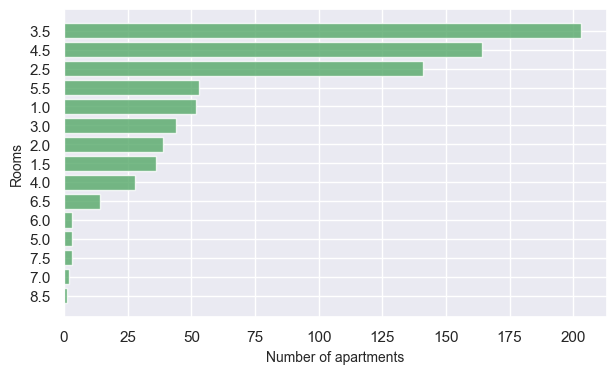

In [24]:
# Group data by rooms (only the topmost 15 values are shown)
df_bar = df['rooms'].value_counts().nlargest(15).sort_values(ascending=True)

# Values for barchart
napart = list(df_bar.values)
index = list(df_bar.index.values)
y_pos = np.arange(len(index))

# Figure
fig, ax = plt.subplots(figsize=(7,4))
ax.barh(y_pos, napart, align='center', color='g', alpha=0.8)
ax.set_yticks(y_pos, index)
ax.set_xlabel('Number of apartments', fontsize=10)
ax.set_ylabel('Rooms', fontsize=10)

# Show graph
plt.show()

### Piechart (matplotlib)

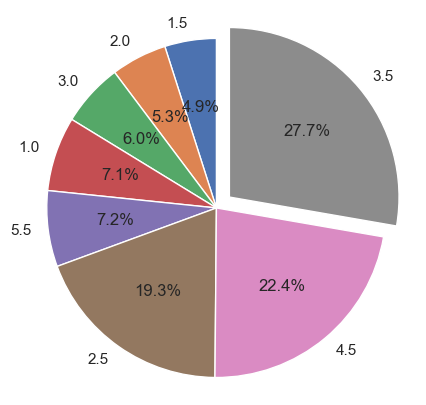

In [25]:
# Group data by rooms (only the 8 most frequently occurencies by rooms)
df_bar = df.rooms.value_counts().nlargest(8).sort_values(ascending=True)

# Simple bar chart
sizes = list(df_bar.values)
labels = list(df_bar.index.values)
explode = (0, 0, 0, 0, 0.0, 0, 0, 0.1) # increases distance of pieces

fig1, ax1 = plt.subplots(figsize=(5,5))
ax1.pie(sizes, 
        labels=labels, 
        explode=explode,
        autopct='%1.1f%%',
        shadow=False, 
        startangle=90)
ax1.axis('equal')  # ensures that pie is drawn as a circle.

plt.show()

## Multivariate graphical exploratory data analysis (EDA)

### Scatterplot (matplotlib)

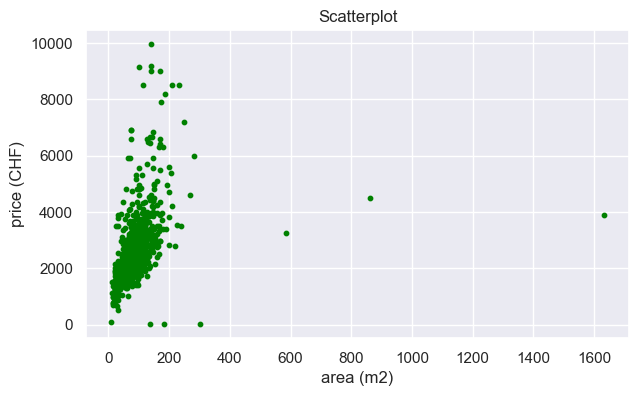

In [26]:
plt.figure(figsize=(7,4))
plt.scatter(df['area'], 
           df['price'], 
           color="green", 
           alpha=1.0,
           s=10)
plt.title('Scatterplot', fontsize=12)
plt.xlabel('area (m2)')
plt.ylabel('price (CHF)')
plt.show()

### Scatterplot (matplotlib) with regression line

(769, 17)
5.842687833767075
2149.048715931789


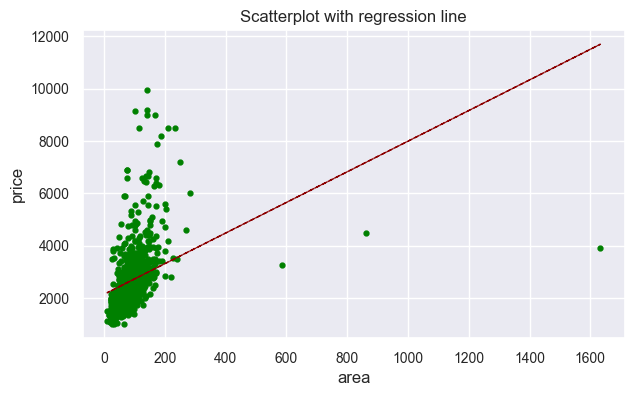

In [27]:
# Subset
df_sub = df.loc[(df.price >= 1000)]
print(df_sub.shape)

# Scatterplot
plt.figure(figsize=(7,4))
plt.plot(df_sub.area, 
         df_sub.price, 
         'o', 
         markersize=3.5,
         color="green")

# Regression line (b = slope, a=intercept)
b, a = np.polyfit(df_sub.area, df_sub.price, 1)
print(b)
print(a)

# Plot regression line
plt.plot(df_sub.area, 
         b*df_sub.area + a, 
         linewidth=1,
         linestyle='dashed',
         color='darkred')

# Add title and axes labels
plt.title('Scatterplot with regression line', fontsize=12)
plt.ylabel('price', fontsize=12)
plt.xlabel('area', fontsize=12)

# Set fontsize of tick labels
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)

plt.show()

### Scatterplot-matrix (seaborn)

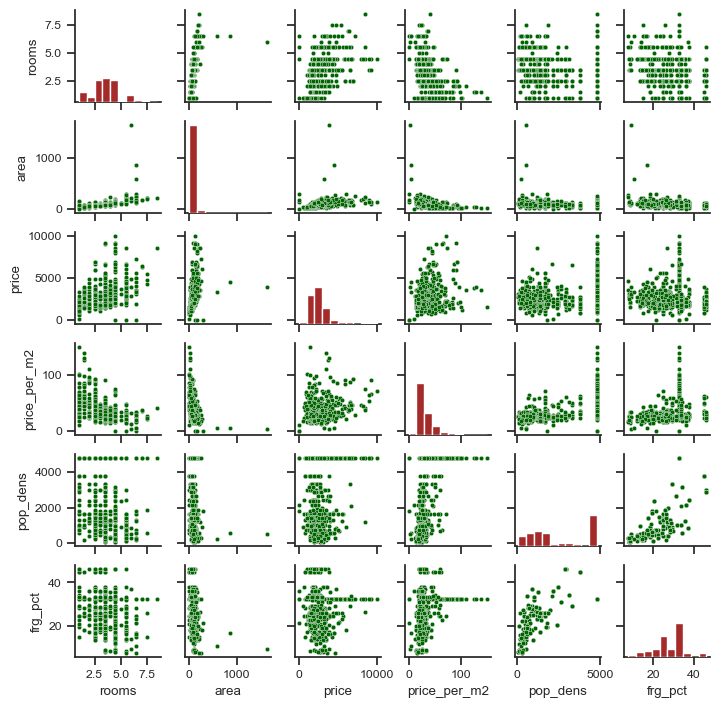

In [28]:
sns.set(style="ticks", font_scale=0.8)
g = sns.PairGrid(df[['rooms', 
                     'area', 
                     'price', 
                     'price_per_m2',
                     'pop_dens',
                     'frg_pct']], 
                 height=1.2, 
                 aspect=1)
g.map_upper(sns.scatterplot,color='darkgreen', s=10)
g.map_lower(sns.scatterplot, color='darkgreen', s=10)
g.map_diag(plt.hist, color='brown')

### Hexagonal binning plot  (matplotlib)

(751, 17)


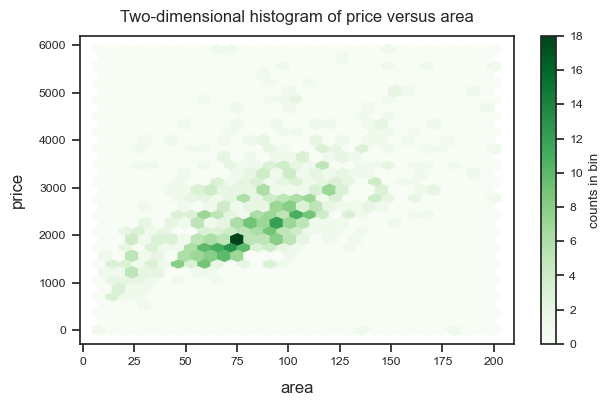

In [29]:
# Subset
df_sub = df.loc[(df.price <= 6000) & (df.area <= 200)]
print(df_sub.shape)

# Plot
fig = plt.figure( figsize=(7,4) )
plt.hexbin(df_sub.area, df_sub.price, gridsize=30, cmap='Greens')

# Set labels
plt.xlabel('area', fontsize=12, labelpad=10)
plt.ylabel('price', fontsize=12, labelpad=10)
plt.title('Two-dimensional histogram of price versus area', fontsize=12, pad=10)

cb = plt.colorbar(label='count in bin')
cb.set_label('counts in bin')

### Correlation heatmap (seaborn)

<Axes: >

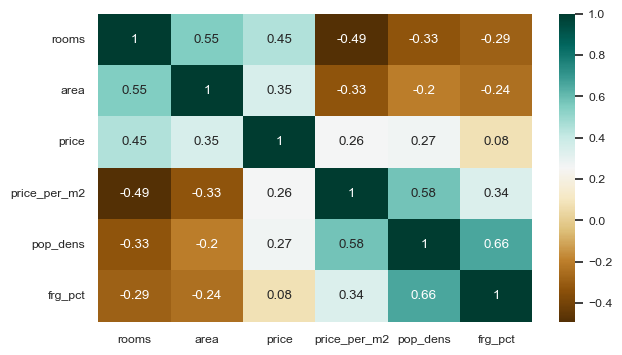

In [30]:
# Set font size for plot
sns.set(font_scale=0.8)

# Create correlation matrix as the basis for the heatmap
plt.figure(figsize=(7,4))
corr = df[['rooms', 
                     'area', 
                     'price', 
                     'price_per_m2',
                     'pop_dens',
                     'frg_pct']].corr().round(2)

# Plot heatmap
sns.heatmap(corr, 
            cmap="BrBG", 
            annot=True)

### Bubble plot (seaborn)

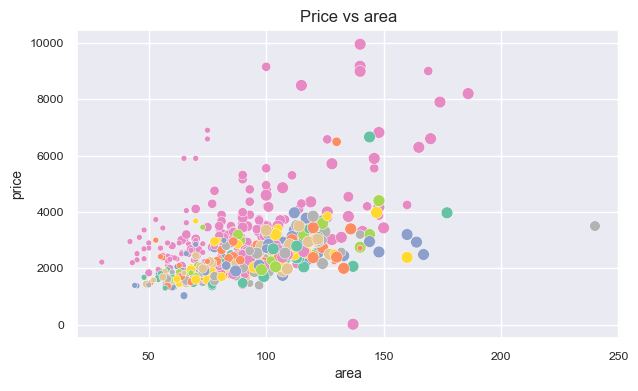

In [31]:
# Subset of df
df_sub = df.loc[(df['rooms'] >= 2.5) & (df['rooms'] <= 4.5)]

plt.figure(figsize=(7,4))
plt.ticklabel_format(style='plain')
cmap = sns.cubehelix_palette(dark=.3, light=3, as_cmap=True)

ax = sns.scatterplot(x="area", 
                     y="price",
                     size="rooms", # determines bubble size
                     hue="pop_dens",  # determines color
                     palette="Set2",
                     data=df_sub)

# Set title and axes
ax.set_title('Price vs area', fontsize = 12)
ax.set_xlabel('area', fontsize = 10)
ax.set_ylabel('price', fontsize = 10)
ax.legend([],[], frameon=False) # skip legend

## Graphics with and without outliers

The fields with more extrema values are 'price' and 'area' we will focus on these two variables, for the creation of graphics with and without outliers.

### Graphics including outliers

#### Boxplots including outliers (Area and Price per m²)

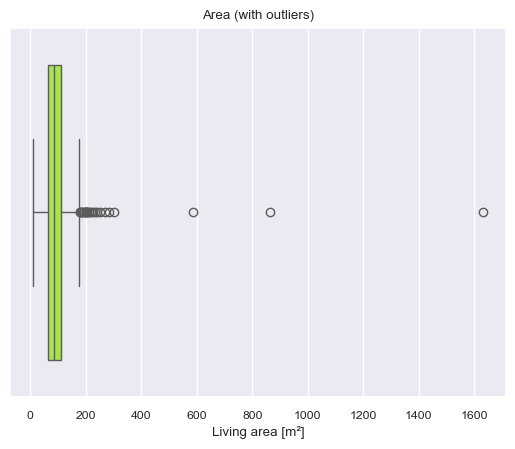

In [35]:
sns.boxplot(x=df['area'], color="greenyellow")
plt.title('Area (with outliers)')
plt.xlabel('Living area [m²]')
plt.show()

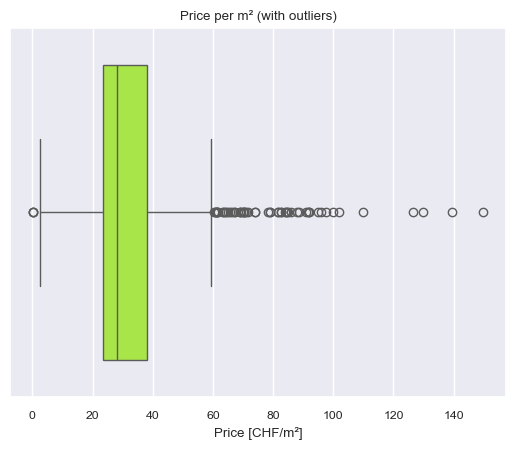

In [36]:
sns.boxplot(x=df['price_per_m2'], color="greenyellow")
plt.title('Price per m² (with outliers)')
plt.xlabel('Price [CHF/m²]')
plt.show()

#### Density plot including outliers (Area and Price per m²)

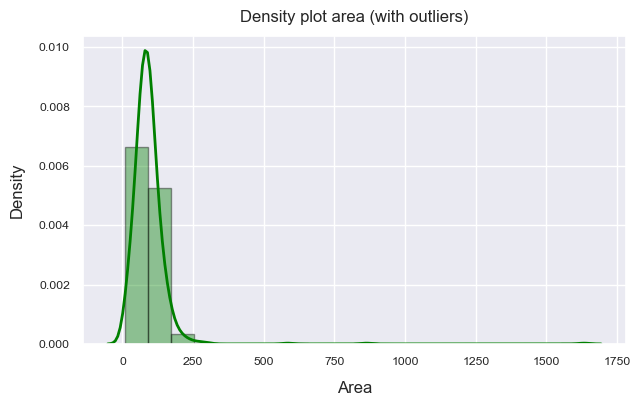

In [60]:
plt.figure(figsize=(7,4))
sns.distplot(df['area'],
             hist=True,
             kde=True,
             bins=20,
             color='green',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2},
            )
plt.title('Density plot area (with outliers)', fontsize=12, pad=10)
plt.xlabel('Area', fontsize=12, labelpad=10)
plt.ylabel('Density', fontsize=12, labelpad=10)
plt.grid(True)
plt.show()

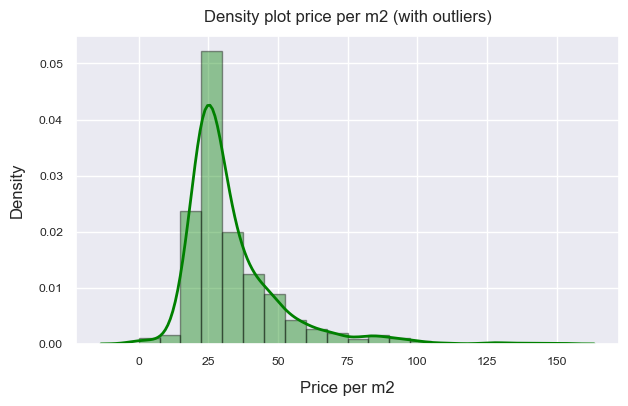

In [61]:
plt.figure(figsize=(7,4))
sns.distplot(df['price_per_m2'],
             hist=True,
             kde=True,
             bins=20,
             color='green',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2},
            )
plt.title('Density plot price per m2 (with outliers)', fontsize=12, pad=10)
plt.xlabel('Price per m2', fontsize=12, labelpad=10)
plt.ylabel('Density', fontsize=12, labelpad=10)
plt.grid(True)
plt.show()

#### Scatterplot including outliers

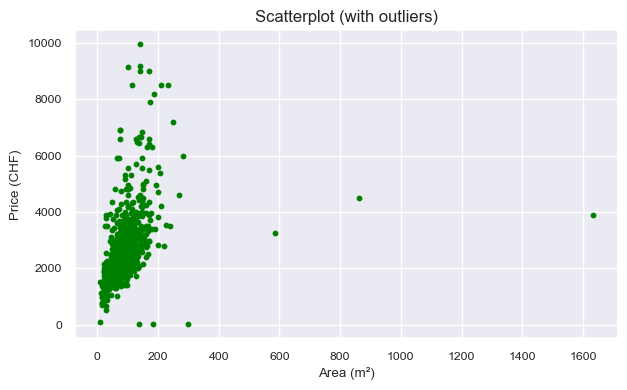

In [71]:
plt.figure(figsize=(7,4))
plt.scatter(df['area'],
            df['price'],
            color="green",
            alpha=1.0,
            s=10)
plt.title('Scatterplot (with outliers)', fontsize=12)
plt.xlabel('Area (m²)')
plt.ylabel('Price (CHF)')
plt.show()

### Graphics excluding outliers

In [66]:
# Lets first remove outliers from the dataset
df_no_outliers = df.loc[
    (df['area'] <= 300) &
    (df['price_per_m2'] <= 100)
]
print("Original dataset:", len(df))
print("After removing outliers:", len(df_no_outliers))

df_no_outliers[['price','rooms', 'area']].kurtosis()

Original dataset: 786
After removing outliers: 777


price    6.787496
rooms    0.132308
area     2.522447
dtype: float64

#### Boxplots excluding outliers (Area and Price per m²)

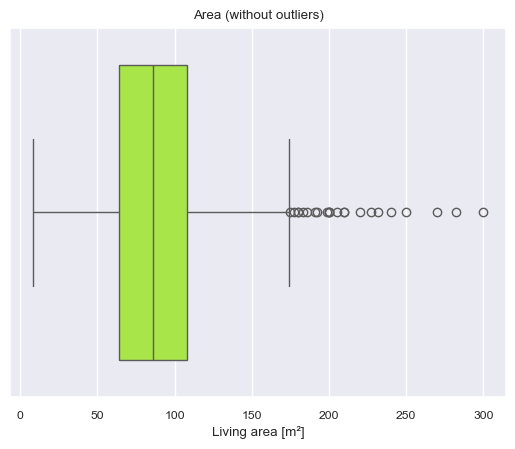

In [67]:
sns.boxplot(x=df_no_outliers['area'], color="greenyellow")
plt.title('Area (without outliers)')
plt.xlabel('Living area [m²]')
plt.show()

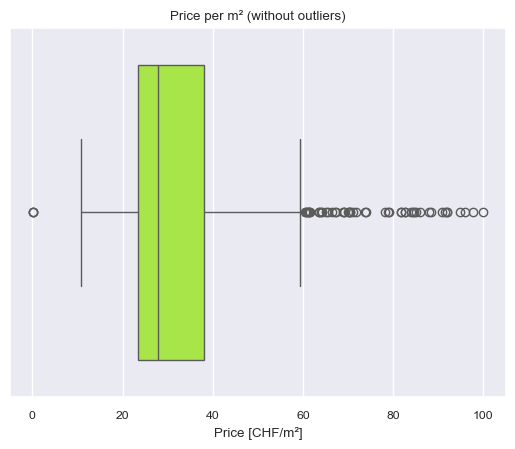

In [68]:
sns.boxplot(x=df_no_outliers['price_per_m2'], color="greenyellow")
plt.title('Price per m² (without outliers)')
plt.xlabel('Price [CHF/m²]')
plt.show()

#### Density plot excluding outliers (Area and Price per m²)

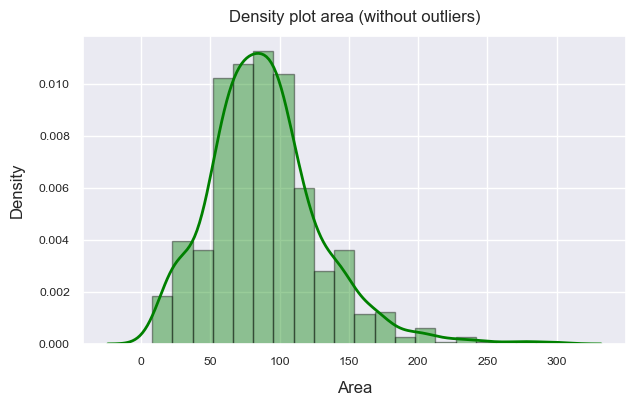

In [69]:
plt.figure(figsize=(7,4))
sns.distplot(df_no_outliers['area'],
             hist=True,
             kde=True,
             bins=20,
             color='green',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2},
            )
plt.title('Density plot area (without outliers)', fontsize=12, pad=10)
plt.xlabel('Area', fontsize=12, labelpad=10)
plt.ylabel('Density', fontsize=12, labelpad=10)
plt.grid(True)
plt.show()

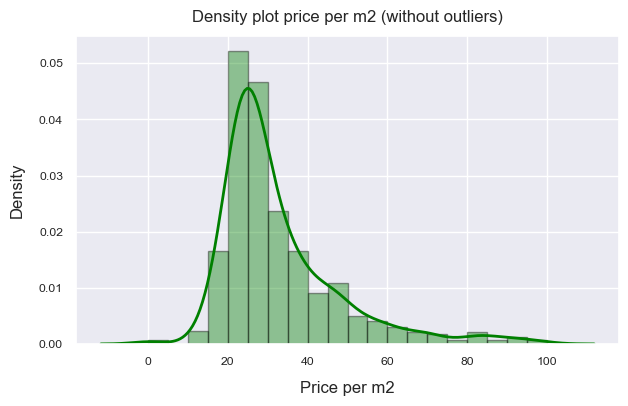

In [70]:
plt.figure(figsize=(7,4))
sns.distplot(df_no_outliers['price_per_m2'],
             hist=True,
             kde=True,
             bins=20,
             color='green',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2},
            )
plt.title('Density plot price per m2 (without outliers)', fontsize=12, pad=10)
plt.xlabel('Price per m2', fontsize=12, labelpad=10)
plt.ylabel('Density', fontsize=12, labelpad=10)
plt.grid(True)
plt.show()

#### Scatterplot excluding outliers

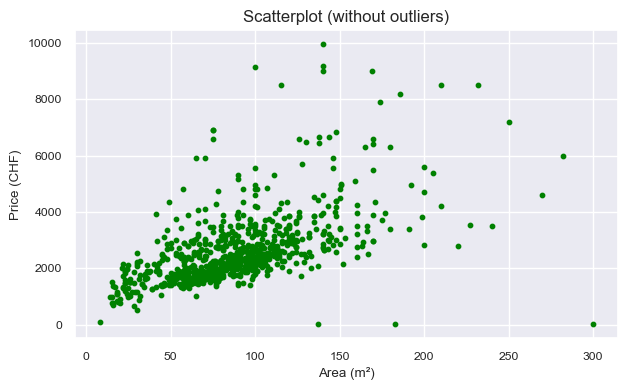

In [72]:
plt.figure(figsize=(7,4))
plt.scatter(df_no_outliers['area'],
            df_no_outliers['price'],
            color="green",
            alpha=1.0,
            s=10)
plt.title('Scatterplot (without outliers)', fontsize=12)
plt.xlabel('Area (m²)')
plt.ylabel('Price (CHF)')
plt.show()

### Jupyter notebook --footer info-- (please always provide this at the end of each submitted notebook)

In [32]:
import os
import platform
import socket
from platform import python_version
from datetime import datetime

print('-----------------------------------')
print(os.name.upper())
print(platform.system(), '|', platform.release())
print('Datetime:', datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
print('Python Version:', python_version())
print('-----------------------------------')

-----------------------------------
NT
Windows | 10
Datetime: 2025-11-08 16:10:54
Python Version: 3.10.5
-----------------------------------
